<head>
    <style>
        .md-typeset h2 {
            margin:0;
            }
        .md-typeset h3 {
            margin:0;
            }
        .jupyter-wrapper table.dataframe tr, .jupyter-wrapper table.dataframe th, .jupyter-wrapper table.dataframe td {
            text-align:left;
            }
        .jupyter-wrapper table.dataframe {
            table-layout: auto;
            }
        .jp-RenderedText pre {
            display: inline-block;
            overflow-x: auto;
            width: max-content;
        }
    </style>
</head>

# Lab 2 -Get to know your dataset

As we have explained in our class, you will write a term paper based on a
survey called _China 2005 questionnaire_. The survey has two parts:

- Investment Climate Survey (FOR COMPANY MANAGERS）
- Investment Climate Survey (FOR Accountants and HR manager of the company)

This means both top managers, accountants, and HR manager participated the 
survey. 

## How to find a research question for your term paper? 

When it comes to your term paper, you need to have a concrete topic. Since
we are studying innovation, your topic should be about innovation. To help you
find a reserch question, I will give some examples that I found from 
_management science_ and then analyze it from a perspective of data analysis. 

In 2016, Daniel Bradley, Incheol Kim, Xuan Tian published a paper
called _Do Unions Affect Innovation?_ There, they examine the _effect
of unionization on firm innovation_ with regression models. This question is 
very straightforward, it is about impact of unionization on firm innovation.
Therefore,

- dependent variable: firm innovation (measured by patent counts)
- indepdent variable: unionization (measured by results of vote)

The regression model they use is

$$\ln(Innovation) = \alpha + \beta Unionization + \gamma Z + \epsilon $$

where $Z$ contains some observable firm features and control variables.

Let's see another example: CEO Overconfidence and Innovation. In this paper,
Alberto Galasso, Timothy S. Simcoe asked: _Are the attitudes and beliefs of 
chief executive officers (CEOs) linked to their firms' innovative performance?_

Again, this question is very straightforward. They are trying to link 
the attitudes and beliefs of CEOs to their firms' innovation performance:

- depdent variable: firm innovation (measured by patent citation)
- indepdent variable: CEO's attitudes to risk (measured by investment decision)

The regression model is:

$$\ln(Y) = \alpha + \beta O + \gamma X + \epsilon $$

Where $Y$ is the patent citation, $O$ is CEO's attitude to risk, and $X$ is
a vector of control variables. 

### More examples

- Title: Corporate Innovation Along the Supply Chain
- Main idea: link innovation with supply chain
- Depdent variable: patent 
- Independent variable: supplier geographic distance (how far or close of a firm's supplier locate)
- Model: $Innovation = \alpha + \beta \ln(Distance) + \gamma X + \epsilon$
- Result: negative effect of distance, meaning the further distance a firm has
with its supplier, the less innovative it is 
- Implication: keep your suppliers (especially those key components) close 


- Title: The Effects of Communication on Technological Innovation
- Main idea: link innovation with communication 



## Our Topic

Now, we will find a topic together, form a question and try to use regression
to answer our question. 

We all know firms care about profit a lot, therefore we will try to examine
the relationship between firm's profit with different factors. Before we start 
it, please watch this video and learn how to create a do file in Stata. 

<iframe width="560" height="315" src="https://www.youtube.com/embed/3hlTtlR-_a8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Find the dependent variable 

Since we will examine the relationship between __profit__ and other factors,
our depdent variable should be about profit. If we look up our survey,
we can find the following questions related to profit in page 14:

- core business profits
- other business profit
- operation profits
- total profits 

> Which one should we use? The answer depends on what you want to examine.

Before we choose, let's get to know the __descriptive statistics__ for those
variables. 

> Use your business and economic knowlege.

- for total profits, can we say higher profit one firm has the better management it has?
- for core business, what is the share of core business profits in total profits? 

Okay, Let's play with data. Looking up the survey, we have:

<img src='/teachings/regression/images/survey_profits.png'>

Variables that are highlighted are relevant ones. However, they reported profits
for three years. Right now, we will focus on the analysis of 2003: 

- core business profits `AB1206`
- other business profit `AB1208`
- operation profits `AB1213`
- total profits `AB1214`

In [2]:
// read our datasets 
// you can just double-click your dataset 
// stata will load your dataset 
use China2005_data.dta

In [3]:
// describe the dataset
// this describes the whole dataset 
describe 


Contains data from China2005_data.dta
  obs:        12,400                          
 vars:           295                          5 Dec 2021 20:58
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
idstd           long    %12.0g                WEB STD FIRMID
sys_zdm         str7    %9s                   
ac11            float   %9.0g                 
ac12            float   %9.0g                 
ac13            float   %9.0g                 
ac14            float   %9.0g                 
ac15            float   %9.0g                 
ac16            float   %9.0g                 
ac17            float   %9.0g                 
ac18            float   %9.0g                 
ac19            float   %9.0g                 
ac21            float   %9.0g                 
ac22     

We can get the following information:

- 12400 observations
- 295 variables (many of them we will not touch it at all)

In [4]:
// we could also describe the variables we care
describe ab1206 ab1208 ab1213 ab1214


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
ab1206          float   %9.0g                 
ab1208          float   %9.0g                 
ab1213          float   %9.0g                 
ab1214          float   %9.0g                 


When you see _float_, which means those variables store numbers (not text). 

In [6]:
// let's label them first
label variable ab1206 "core business profits 2003"
label variable ab1208 "other business profit 2003"
label variable ab1213 "operation profits 2003"
label variable ab1214 "total profits"

In [7]:
// describe them again
describe ab1206 ab1208 ab1213 ab1214


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
ab1206          float   %9.0g                 core business profits 2003
ab1208          float   %9.0g                 other business profit 2003
ab1213          float   %9.0g                 operation profits 2003
ab1214          float   %9.0g                 total profits


(bin=40, start=-3879120, width=345192.95)


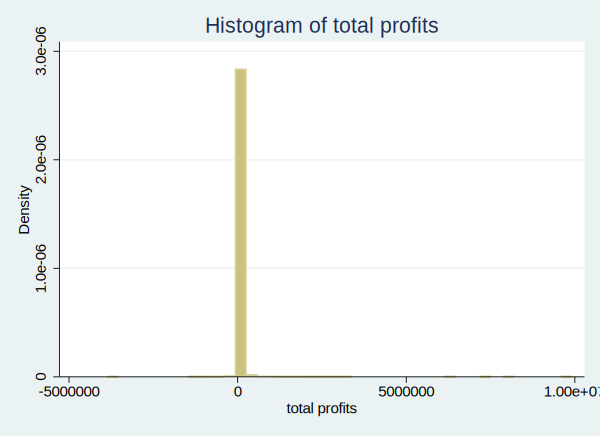

In [9]:
// visualize the variabe total profits ab1214 
histogram ab1214, title("Histogram of total profits")

### Clean your variable

When we plot the histogram of total profits, we notice that many values are 0.
We need to figure out why. Let's start to summarize the variable. 

In [10]:
// summarize ab1214
summarize ab1214


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ab1214 |     12,400    20127.75    193519.8   -3879120    9928598


> Can profits be negative? Sure, which means the firm is losing money in 2003. 

We have mean 20127, stand deivation is 193519, which is very big. Let's do
another plot to take a look. 

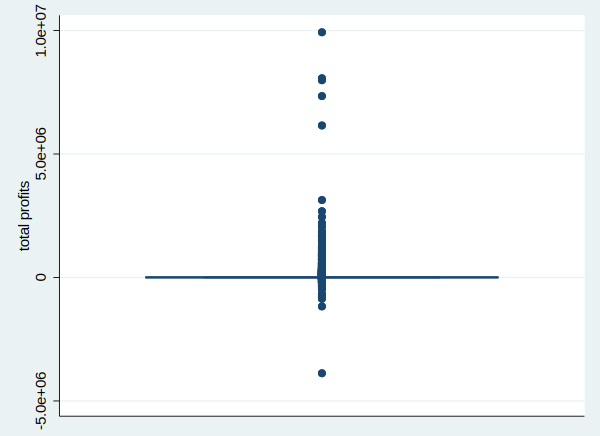

In [11]:
graph box ab1214  // we have lots of outlier 

In [13]:
// summarize with detial 
summarize ab1214, detail


                        total profits
-------------------------------------------------------------
      Percentiles      Smallest
 1%     -36903.5       -3879120
 5%     -4140.65       -1172471
10%      -880.15        -862310       Obs              12,400
25%        11.55        -803663       Sum of Wgt.      12,400

50%          610                      Mean           20127.75
                        Largest       Std. Dev.      193519.8
75%         6146        7344479
90%        32724        7986163       Variance       3.74e+10
95%        75847        8066900       Skewness       30.34191
99%     363681.5        9928598       Kurtosis       1306.328


> What are the unit of those number? (thousand yuan $\approx$ 100 Euro)

We learned that at 25% percentile, the total profit is $11.55$ thousand yun
(or around 1100 Euro per year). Do you think it is a lot? 

Since we have so many observations (12,400), we have to realize that __there
are many different kinds of firms__ in our dataset, such as:

- could be different in terms of size: big, medium, small
- could be different in terms of efficiency: high margin, medium margin, low margin

> This brings us trouble because we have so many heterogeneity. However, this
also allows us to ask a more concrete research questions.

For example, our research question could be: Does a stable supplier relationship
make a small firm more profit? 

(bin=39, start=.1, width=254579.43)


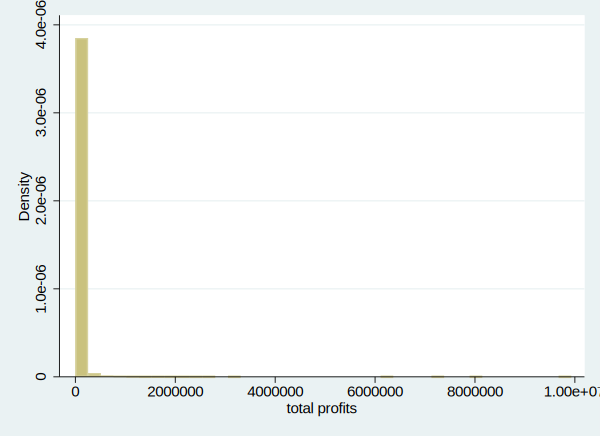

In [14]:
// now let's plot total profits ab1214 for firms are making money
histogram ab1214 if ab1214 > 0 

In [15]:
summarize ab1214 if ab1214 > 2000000


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ab1214 |         10     5201109     2997426    2051494    9928598


(bin=39, start=.1, width=47771.869)


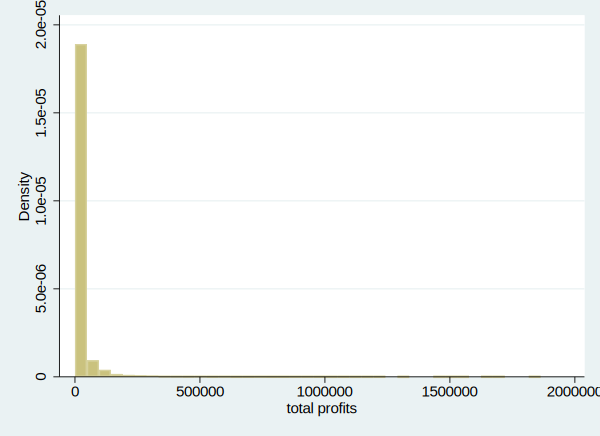

In [16]:
histogram ab1214 if ab1214 > 0 & ab1214 < 2000000

In [17]:
summarize ab1214 if ab1214 > 500000


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      ab1214 |         89     1378149     1702015     501655    9928598


![income-inequality](https://www.census.gov/library/visualizations/2015/demo/distribution-of-household-income--2014/_jcr_content/root/responsivegrid/embeddableimage65.coreimg.png/1459361296671/hh-inc-dist.png)

(bin=39, start=.1, width=12815.946)


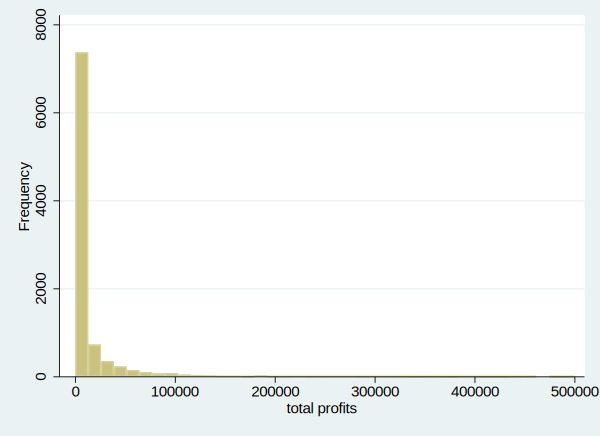

In [18]:
histogram ab1214 if ab1214 > 0 & ab1214 < 500000, frequency

(bin=39, start=.1, width=2563.6385)


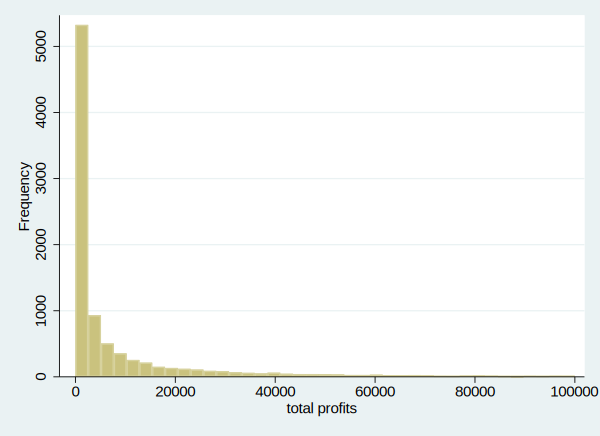

In [19]:
histogram ab1214 if ab1214 > 0 & ab1214 < 100000, frequency

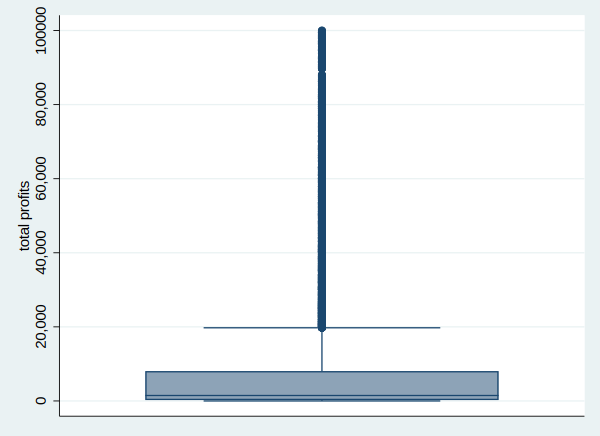

In [21]:
graph box ab1214 if ab1214 > 0 & ab1214 < 100000

> Where is normal distribution? 

In [22]:
summarize ab1214, detail


                        total profits
-------------------------------------------------------------
      Percentiles      Smallest
 1%     -36903.5       -3879120
 5%     -4140.65       -1172471
10%      -880.15        -862310       Obs              12,400
25%        11.55        -803663       Sum of Wgt.      12,400

50%          610                      Mean           20127.75
                        Largest       Std. Dev.      193519.8
75%         6146        7344479
90%        32724        7986163       Variance       3.74e+10
95%        75847        8066900       Skewness       30.34191
99%     363681.5        9928598       Kurtosis       1306.328


<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>

(bin=37, start=11.1, width=165.72703)


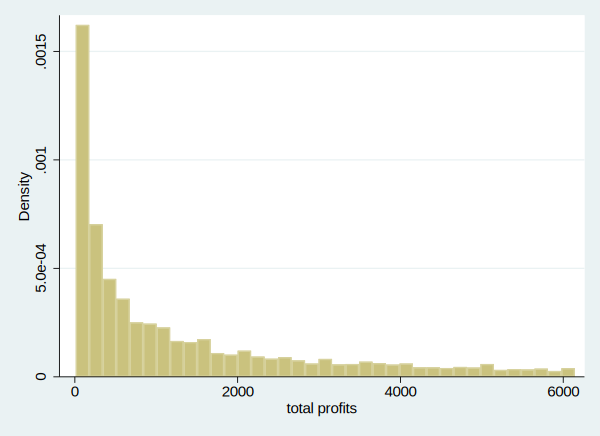

In [24]:
histogram ab1214 if ab1214 >11 & ab1214 < 6146

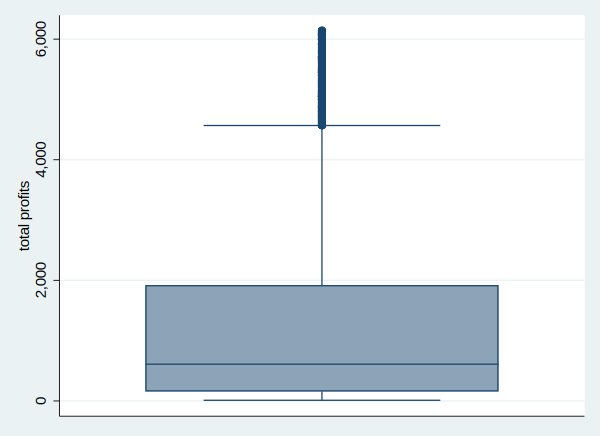

In [25]:
graph box ab1214 if ab1214 >11 & ab1214 < 6146

(bin=34, start=-3879120, width=114091.76)


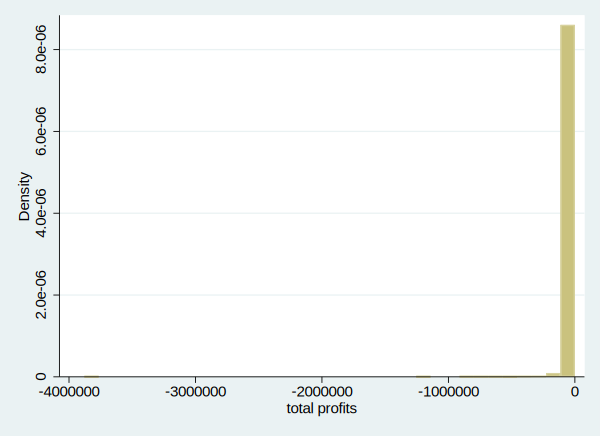

In [26]:
histogram ab1214 if ab1214 < 0 

In [36]:
// generate a categorical varialbe to categorize firms
// use -1 to indicate firms losing money
// use 0 to indicate firms that making profit 0 to 6000
// use 1 to indicate firms that making profit > 6000 
generate profit_category = 1 if ab1214 > 6000

(9,265 missing values generated)


In [37]:
replace profit_category = 0 if ab1214 > 0 & ab1214 <= 6000 

(6,443 real changes made)


In [38]:
replace profit_category = -1 if ab1214 <= 0 

(2,822 real changes made)


In [49]:
label variable profit_category "Firm category based on proftis -1, 0, 1"

In [50]:
describe profit_category


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
profit_category float   %9.0g                 Firm category based on proftis -1,
                                                0, 1


In [39]:
tabulate profit_category


profit_cate |
       gory |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 |      2,822       22.76       22.76
          0 |      6,443       51.96       74.72
          1 |      3,135       25.28      100.00
------------+-----------------------------------
      Total |     12,400      100.00


In [40]:
tabulate profit_category, summarize(ab1214)


profit_cate |      Summary of total profits
       gory |        Mean   Std. Dev.       Freq.
------------+------------------------------------
         -1 |  -10951.667   88973.471       2,822
          0 |   1213.4526      1481.4       6,443
          1 |   86976.536   367364.91       3,135
------------+------------------------------------
      Total |   20127.751   193519.81      12,400


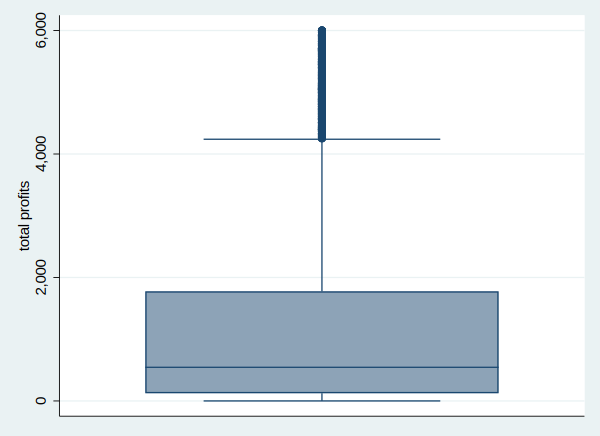

In [43]:
// focus on sme that making profits 
graph box ab1214 if profit_category == 0

(bin=38, start=.1, width=157.89211)


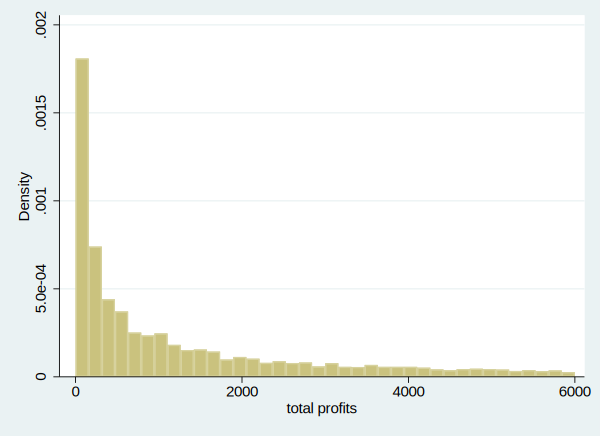

In [45]:
histogram ab1214 if profit_category == 0 

### Forcusing on those small and medium firms  

Now, we will focus on those small and medium firms that could make some profits. 
We need to find indepdent variablbes. 

### Find the independent variables 

When I look at survey, there are many things we could explore:

- relationship between ownership (A4) and profits 
- access to finance (B107) and profits 
- access to information on laws and regulations (B113) and profits 
- job trainning (E101) and profits
- ratio of staff who regulary use computers (F5)
- many many more... 

However, before we pin down an independent variable, we need to have a
hypothesis like:

- if firms have job-training, what will happen to their profits 
- if they could access to information on laws and regulations, what will happen to 
their profits. 
- what if ... 

How to check the relationship between those variables. It is very important 
to check the __correlation__ and __relationship displayed in the graph__. 

In [51]:
// ownership and profits 
describe a4


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
a4              str1    %9s                   


Variable `a4` is a string, which means it is text that you can not summarize. 

In [52]:
summarize a4 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          a4 |          0


In [53]:
tabulate a4


         a4 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      1,122        9.05        9.05
          2 |        869        7.01       16.06
          3 |        365        2.94       19.00
          4 |      4,573       36.88       55.88
          5 |      1,255       10.12       66.00
          6 |      1,675       13.51       79.51
          7 |        990        7.98       87.49
          8 |      1,398       11.27       98.77
          9 |        153        1.23      100.00
------------+-----------------------------------
      Total |     12,400      100.00


- (1) State-owned (SOE) 
- (2) Collective-owned 
- (3) Share joint-owned units 
- (4) Limited liability corporation 
- (5)Shareholding corporations 
- (6) private-owned 
- (7)Enterprises invested by HK, Macau, Taiwan 
- (8) FIE 
- (9) Others


In [54]:
// you can not run correlation for string variable 
correlate a4 ab1214 if profit_category == 0 

(a4 ignored because string variable)
(obs=6,443)

             |   ab1214
-------------+---------
      ab1214 |   1.0000



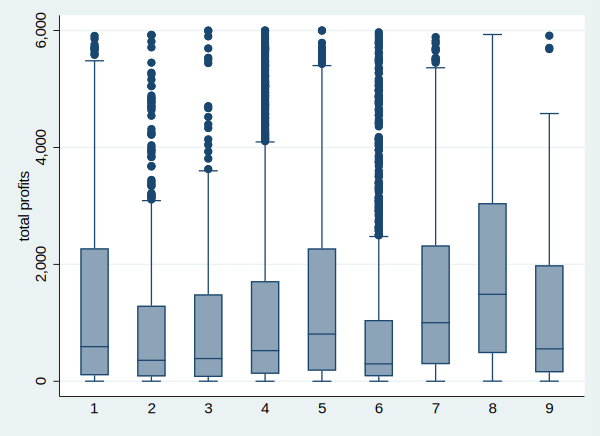

In [56]:
// use graph
graph box ab1214 if profit_category == 0 , over(a4) 

In [57]:
// access to information on laws and regulations
describe b113


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
b113            str1    %9s                   


In [58]:
tabulate b113


       b113 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      5,999       48.38       48.38
          1 |      4,330       34.92       83.30
          2 |      1,695       13.67       96.97
          3 |        335        2.70       99.67
          4 |         41        0.33      100.00
------------+-----------------------------------
      Total |     12,400      100.00


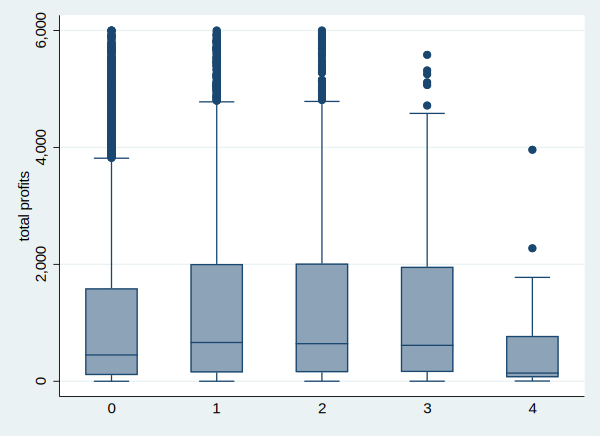

In [59]:
graph box ab1214 if profit_category == 0 , over(b113) 

In [66]:
// job training 
describe e101


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
e101            str1    %9s                   


In [67]:
tabulate e101 if profit_category == 0 


       e101 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      5,485       85.13       85.13
          2 |        958       14.87      100.00
------------+-----------------------------------
      Total |      6,443      100.00


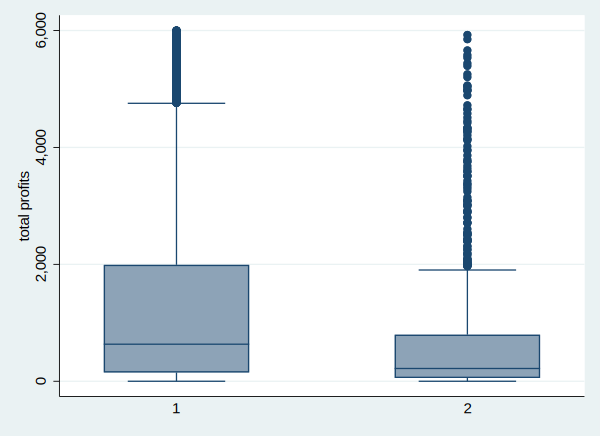

In [68]:
graph box ab1214 if profit_category == 0, over(e101)

> Reverse causality 

In [69]:
// ration of staff who regulary use computers
describe f5


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
f5              float   %9.0g                 


In [71]:
summarize f5 if profit_category == 0 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          f5 |      6,443    14.26252    17.43105          0        100


In [72]:
correlate f5 ab1214 if profit_category == 0

(obs=6,443)

             |       f5   ab1214
-------------+------------------
          f5 |   1.0000
      ab1214 |   0.1166   1.0000



In [73]:
correlate f5 ab1214 if profit_category == -1 

(obs=2,822)

             |       f5   ab1214
-------------+------------------
          f5 |   1.0000
      ab1214 |  -0.0989   1.0000



In [74]:
correlate f5 ab1214 if profit_category == 1

(obs=3,135)

             |       f5   ab1214
-------------+------------------
          f5 |   1.0000
      ab1214 |   0.0625   1.0000



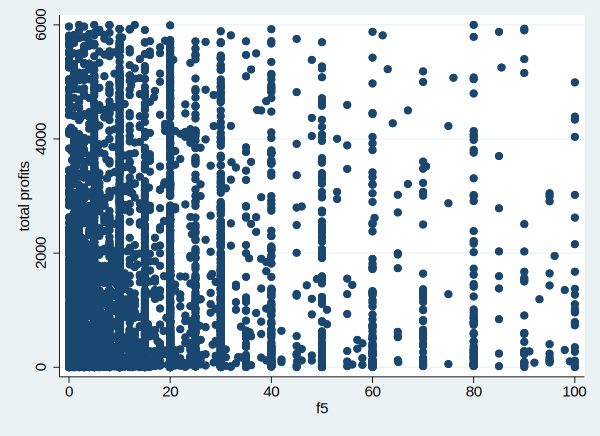

In [75]:
scatter ab1214 f5 if profit_category == 0

In [76]:
regress ab1214 f5 if profit_category == 0 


      Source |       SS           df       MS      Number of obs   =     6,443
-------------+----------------------------------   F(1, 6441)      =     88.79
       Model |   192239271         1   192239271   Prob > F        =    0.0000
    Residual |  1.3945e+10     6,441  2165040.41   R-squared       =    0.0136
-------------+----------------------------------   Adj R-squared   =    0.0134
       Total |  1.4137e+10     6,442  2194545.88   Root MSE        =    1471.4

------------------------------------------------------------------------------
      ab1214 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          f5 |   9.910308   1.051717     9.42   0.000     7.848592    11.97202
       _cons |   1072.107   23.68616    45.26   0.000     1025.674    1118.539
------------------------------------------------------------------------------


In [77]:
regress ab1214 f5 if profit_category == -1


      Source |       SS           df       MS      Number of obs   =     2,822
-------------+----------------------------------   F(1, 2820)      =     27.87
       Model |  2.1857e+11         1  2.1857e+11   Prob > F        =    0.0000
    Residual |  2.2113e+13     2,820  7.8416e+09   R-squared       =    0.0098
-------------+----------------------------------   Adj R-squared   =    0.0094
       Total |  2.2332e+13     2,821  7.9163e+09   Root MSE        =     88553

------------------------------------------------------------------------------
      ab1214 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          f5 |  -471.2221   89.25543    -5.28   0.000    -646.2346   -296.2095
       _cons |   -3763.67   2152.303    -1.75   0.080    -7983.918     456.577
------------------------------------------------------------------------------


In [78]:
regress ab1214 f5 if profit_category == 1 


      Source |       SS           df       MS      Number of obs   =     3,135
-------------+----------------------------------   F(1, 3133)      =     12.30
       Model |  1.6535e+12         1  1.6535e+12   Prob > F        =    0.0005
    Residual |  4.2130e+14     3,133  1.3447e+11   R-squared       =    0.0039
-------------+----------------------------------   Adj R-squared   =    0.0036
       Total |  4.2296e+14     3,134  1.3496e+11   Root MSE        =    3.7e+05

------------------------------------------------------------------------------
      ab1214 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          f5 |   1024.947   292.2945     3.51   0.000     451.8394    1598.056
       _cons |   62158.72   9642.899     6.45   0.000     43251.68    81065.76
------------------------------------------------------------------------------


>Take Away: the regression coefficient could be significant, but it does not
mean you could interpret it in a practical way. 

When we run this simple regression, we formed the folloing model:

$$\text{profits} = \beta_0 + \beta_1 \text{share of stuff who regularly use computer} + \epsilon $$

<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>

## Your Dependent Variable

We will focus on innovation in our case, one of the most common measurements 
for innovation in firm's level is patent. However, we do not have patent. 
Therefore, we need find a variable that could reflect the innovation output.
In this class we assume that there is postiive relationship between R&D (innovation input) and 
patent (innovation output). 

Therefore, we will use [R&D intensity](https://en.wikipedia.org/wiki/R%26D_intensity) as
depdent variable. 